# Decision Trees

They are used for supervised learning for both classification and regression tasks.

Feature importances: [0. 1.]


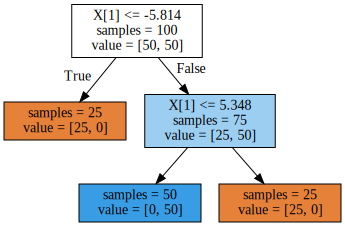

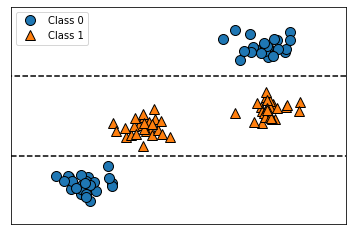

In [1]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

# sudo pip3 install graphviz
# sudo yum install graphviz

mglearn.plots.plot_tree_not_monotone()

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

In [3]:
print('Accuracy on the training subset: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree.score(X_test, y_test)))

"""
Accuracy of 1.00 means that all the leaves are pure. So the branching of the tree went 
all the way down until the algorithm could memorize and fit all the labels.
This is overfitting. It happens because the decision tree was unrestricted 
and went all the way down through the branching until it fit perfectly fit the training data.
"""

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.937


'\nAccuracy of 1.00 means that all the leaves are pure. So the branching of the tree went \nall the way down until the algorithm could memorize and fit all the labels.\nThis is overfitting. It happens because the decision tree was unrestricted \nand went all the way down through the branching until it fit perfectly fit the training data.\n'

To avoid overfitting we apply restrictions to limit the depth of the decision tree which 
in tun is going to limit its complexity.

Pruning technique :

There are two types of pruning, pre and post.
- With pre-pruning we stop the creation of the tree at an earlier stage. 
So we can limit :
1. the depth of the tree.
2. the maximum number of leaves.
3. specify a minimum of points for a node so that it can keep splitting.
By limiting the depth of the tree we limit the number of questions that can be asked.

- With post-pruning, once the tree is created, we can remove irrelevant branches or nodes that 
contain little information.

In [5]:
tree_4 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree_4.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(tree_4.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(tree_4.score(X_test, y_test)))

# It increases the accuracy over the test data.

Accuracy on the training subset: 0.988
Accuracy on the test subset: 0.951


In [6]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='cancertree.dot', class_names=['malignant', 'benign'], feature_names=cancer.feature_names,
               impurity=False, filled=True)

In [7]:
# Transform the .dot to .png
# dot -Tpng cancertree.dot -o cancertree.png

# We have the tumor radius at the top of the tree, this leads us into thinking about the important of this feature.

![](cancertree.png)

![](cancertree_all.png)

We can use a property of the decision tree qhich is called feature importances. 
It will show us how much weight each feature carries for decision making. So each feature 
i attributed zero and one. 0 meaning that the feature is not used for the decision process
while one meaning the it perfectly predcts the target.

In [10]:
print("Feature importances: {}".format(tree.feature_importances_))

Feature importances: [0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


In [11]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


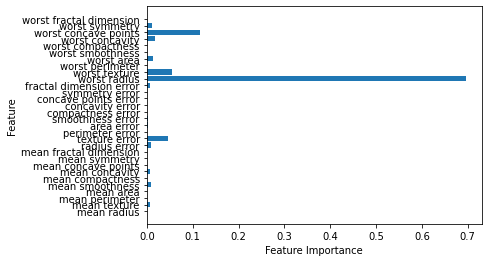

In [13]:
# A better way to do it
import numpy as np

n_features = cancer.data.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# We can see that the most important feature is worst radius, which is, 
# as we've seen before at the top of the tree.


### Advantages of Decision Trees

 - Easy to view and understand.
 - Unlike other machine learning classification algorithms there is no need to pre-process, normalize, scale, and/or standardize features.
 
### Paramaters to work with
 
 - max_depth,
 - min_samples_leaf, max_samples_leaf,
 - max_leaf_nodes,
 - etc.
 
### Main Disadvantages

- Tendency to overfit, even if we create prune tree.
- Poor generalization.

##### => Possible work-around: many machine learning parittioners use ensembles of decision trees